<a href="https://colab.research.google.com/github/G-Shino/colab_tutorial/blob/master/Matplotlib_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# matplotlibについて
- このノートブックの内容自体は[このサイト](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)の焼き直し
- オブジェクト指向インターフェースとPyplotインターフェースの二つの書き方が存在する
- 前者の方が良さげ
- オブジェクトはFigure, Axes, Axisの階層構造になっている。これを意識すると分かりやすくなる


![matplotlib_object](https://camo.qiitausercontent.com/93595c0a3390e9bab8ad83cc7353fa4b742568cb/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3232323834392f31653637353334302d373966662d346161312d313839312d6237396433633336396562332e706e67)

- グラフに表示されるすべての要素はArtistと呼ばれる。さらに、入れ物はcontainer、要素はprimitiveとなる

![Artist and Containers](https://camo.qiitausercontent.com/876445a91e7fa6887ee57311efd273fe2cc680dd/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3232323834392f61303639393039382d663266312d373538352d366534362d3931623430303034383931322e706e67)

## Pyplotインターフェース方式
- MATLABを模した書き方らしい

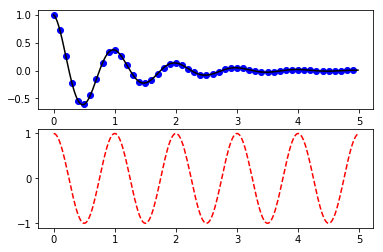

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), "bo", t2, f(t2), "k")

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()



## オブジェクトインターフェース

### 出だしは二種類の書き方がある

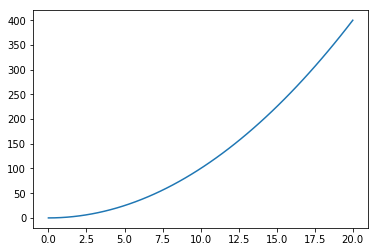

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# x = np.arange(0, 21) 下と同じものができる
x = np.linspace(0, 20)
y = x **2

# Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成
fig, ax = plt.subplots()
ax.plot(x, y)
fig.show()

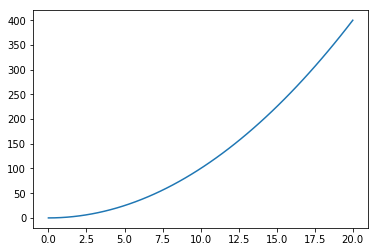

In [0]:
b%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# x = np.arange(0, 21) 下と同じものができる
x = np.linspace(0, 20)
y = x **2

# Figureオブジェクトを作成した後、それに属するAxesオブジェクトを作成
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)
fig.show()

### Axes.line上にLine2Dを追加

ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x7f539bab2390>, <matplotlib.lines.Line2D object at 0x7f539bab27f0>]
line1: [<matplotlib.lines.Line2D object at 0x7f539bab2390>]
line2: [<matplotlib.lines.Line2D object at 0x7f539bab27f0>]


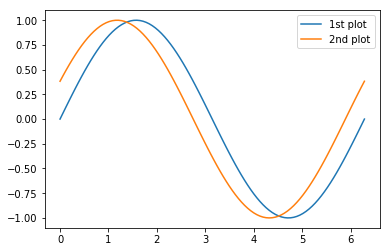

In [0]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure() # Figureを作成
ax = fig.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト
line1 = ax.plot(x, np.sin(x), label='1st plot') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax.lines)
line2 = ax.plot(x, np.sin(x+np.pi/8), label='2nd plot') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax.lines)
ax.legend()
print('line1:', line1)
print('line2:', line2)

### さらにAxes.collectionsにPathCollectionを追加

ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x7f51a0d1fa58>, <matplotlib.lines.Line2D object at 0x7f51a0d1ff28>]
ax.collections before scatter:
 []
ax.collections after scatter:
line1: Line2D(1st plot)
line2: Line2D(2nd plot)
scat: <matplotlib.collections.PathCollection object at 0x7f51a0d1fb70>


Text(0, 0.5, 'y value')

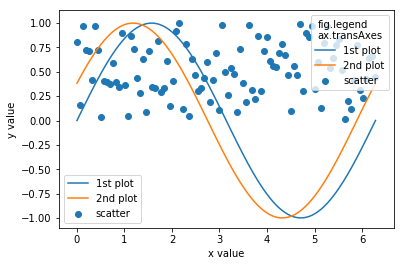

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure() # Figureを作成
ax = fig.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト
line1, = ax.plot(x, np.sin(x), label='1st plot') # Axes.linesにLine2Dを追加
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(x, np.sin(x+np.pi/8), label='2nd plot') # Axes.linesにLine2Dを追加
print('ax.lines after 2nd plot:\n', ax.lines)
print('ax.collections before scatter:\n', ax.collections)
scat = ax.scatter(x, np.random.rand(len(x)), label='scatter') # Axes.collectionsにPathCollectionを追加
print('ax.collections after scatter:\n', ax.collections)
ax.legend()
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes, title='fig.legend\nax.transAxes')

print('line1:', line1)
print('line2:', line2)
print('scat:', scat)
ax.set_xlabel('x value')
ax.set_ylabel('y value')

### tickerについて

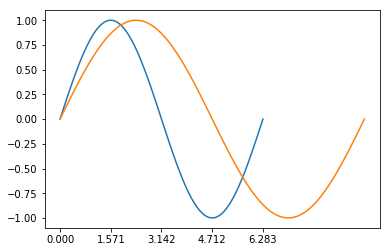

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(x, np.sin(x), label='')
ax.set_xticks([0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi]) # line1のxの範囲に合わせてxticksを設定
line2, = ax.plot(1.5*x, np.sin(x), label='') # line1よりも広いx範囲にプロット

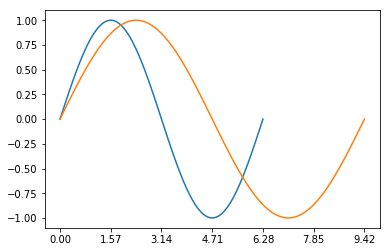

In [0]:
import matplotlib.ticker as ptick # FormatterとLocatorはTickerモジュールが必要

ax.xaxis.set_major_locator(ptick.MultipleLocator(0.5*np.pi)) # 0.5*piごとにtickを書く　Locatorを用いればOK
fig # jupyter notebookでは一度作ったFigureを再度表示させるにはfigを呼ぶ

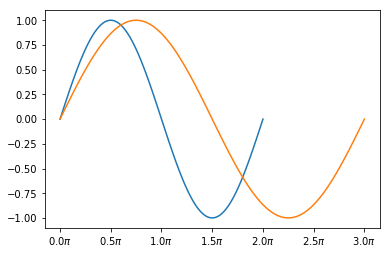

In [0]:
@ptick.FuncFormatter # FuncFormatterだけはデコレータを使える。tickerの表記法を変える
def major_formatter_radian(x, pos):
    return '{}$\pi$'.format(x/np.pi) 

ax.xaxis.set_major_formatter(major_formatter_radian)
fig

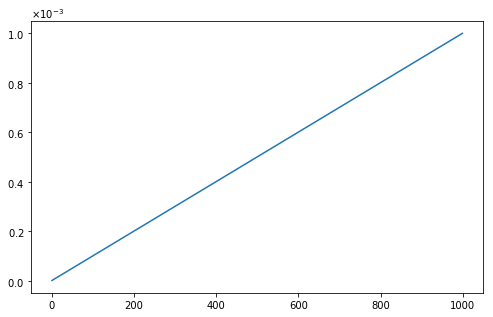

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick 
x = np.arange(1,1000,1)
y = 10e-7*x

fig, ax=plt.subplots(figsize=(5*1.618,5))
ax.plot(x,y)

ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) ## 10のべき乗表記にするか否か
ax.yaxis.offsetText.set_fontsize(10)
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0)) #0以上のものを指数表記にする

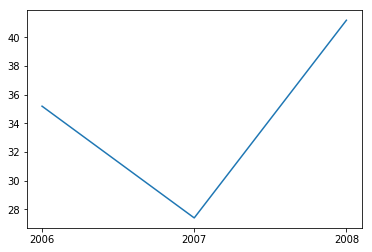

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = np.array([2006, 2007, 2008])
y = np.array([35.2, 27.4, 41.2])

fig, ax = plt.subplots()
# X軸の数字をオフセットを使わずに表現する
ax.get_xaxis().get_major_formatter().set_useOffset(False)
# X軸の数字が必ず整数になるようにする
ax.get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
ax.plot(x, y)

fig.show()

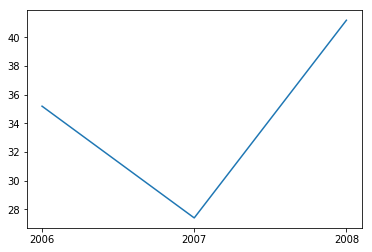

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = np.array([2006, 2007, 2008])
y = np.array([35.2, 27.4, 41.2])

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xticks(x)
ax.set_xticklabels(x)

plt.plot()
plt.show()

# seabornについて
- sns.xplot(x='x軸のカラム', y='y軸のカラム', data=DataFrame型)という形が割と基本かも


## 例えば

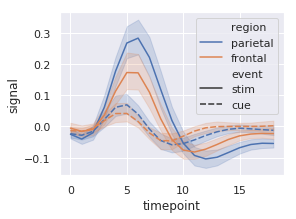

In [0]:
sns.set(style="darkgrid")
plt.figure(figsize=(4, 3)) # デフォルトだと大きいので小さめに
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="region", style="event",
                  data=fmri)

[(0, 3), Text(0, 0.5, 'y position'), (0, 3), Text(0.5, 0, 'x position'), None]

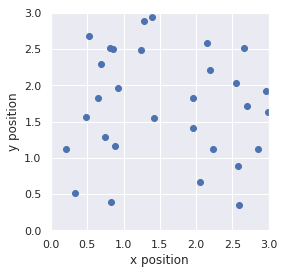

In [0]:
ax = plt.gca()
ax.scatter(3*np.random.rand(30), 3*np.random.rand(30))
ax.set(ylim=(0,3), ylabel='y position', xlim=(0,3), xlabel='x position', aspect='equal')

# 以下と同じ
# ax.set_ylim((0,3))
# ax.set_ylabel('y position')
# ax.set_xlim((0,3))
# ax.set_xlabel('x position')
# ax.set_aspect('equal')

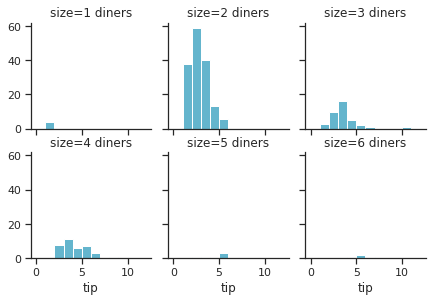

In [0]:
sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="size", col_wrap=3)
g = g.map(plt.hist, "tip", bins=np.arange(0, 13), color="c")
g.set_titles("{col_var}={col_name} diners")
g.fig.set_size_inches((6, 4))

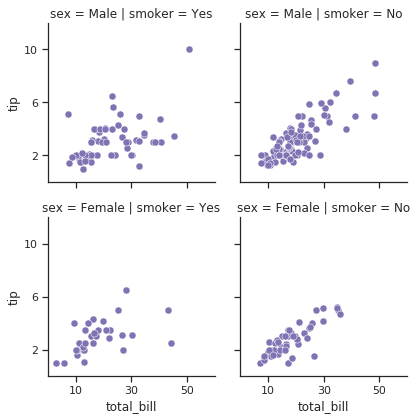

In [0]:
kws = dict(s=50, linewidth=.5, edgecolor="w")
# arg = (1, 2, 3)
# print(*arg)
g = sns.FacetGrid(tips, col="smoker", row="sex")
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws) #**をつけると複数の引数を辞書で渡せる
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

## 回帰モデルの可視化
- seaborn.regplotとseaborn.lmplotの二種類

### regplot
- Axesレベル関数
- matplotlib.axesのオブジェクトを返す

<class 'matplotlib.axes._subplots.AxesSubplot'>


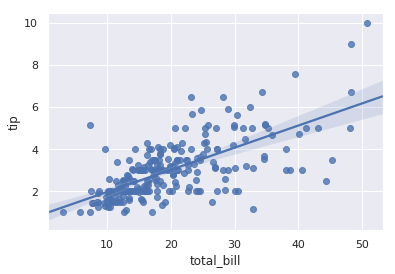

In [59]:
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)
print(type(ax))
plt.show()

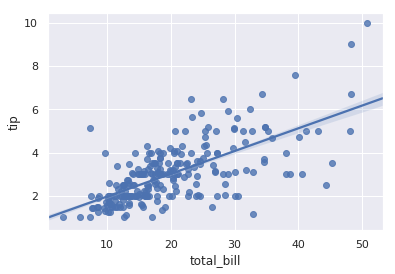

In [58]:
# 信頼区間を50%に設定。
#100回やったら50回はその範囲に収まる今回の場合は直線になる。image
#50%の確率で薄いブルーの範囲内に収まる
sns.regplot(x="total_bill", y="tip", data=tips, ci=50)
plt.show()

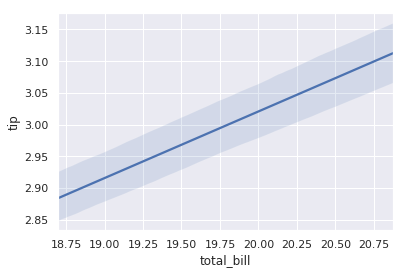

In [61]:
#散布図を表示(scatter) 回帰モデルの表示(fit_reg)
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg = True, scatter=False, ci=50)
plt.show()

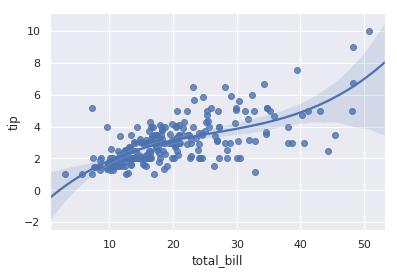

In [63]:
#多項式の回帰
sns.regplot(x="total_bill", y="tip", data=tips, order=3)
plt.show()

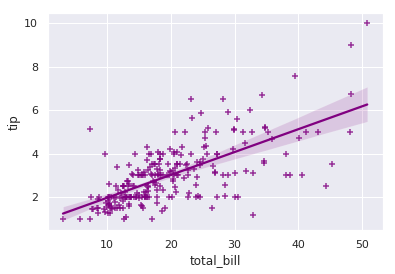

In [80]:
#表示範囲をデータが存在する区間のみにする
#マーカーを+印に
#色を紫
sns.regplot(x="total_bill", y="tip", data=tips, truncate=True,
            marker="+", color="purple")
plt.show()

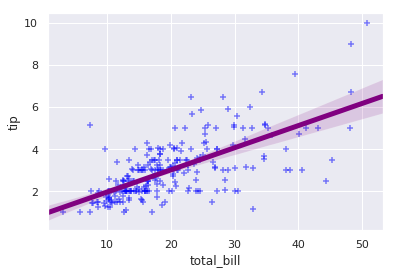

In [79]:
#線の太さを10に。matplotlibのオプションを利用している
sns.regplot(x="total_bill", y="tip", data=tips, marker="+",
           line_kws={"linewidth": 5, "color": "purple"},
           scatter_kws={"color": "blue", "alpha": 0.5})
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)
True


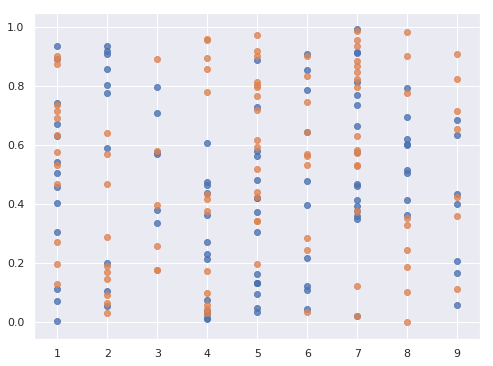

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x_values = np.random.randint(1, 10, 100)
y_values_1 = np.random.rand(len(x_values))
y_values_2 = np.random.rand(len(x_values))

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax1 = sns.regplot(x=x_values, y=y_values_1, fit_reg=False)
ax2 = sns.regplot(x=x_values, y=y_values_2, fit_reg=False)
print(ax1, ax2)
print(id(ax1) == id(ax2))
plt.show()

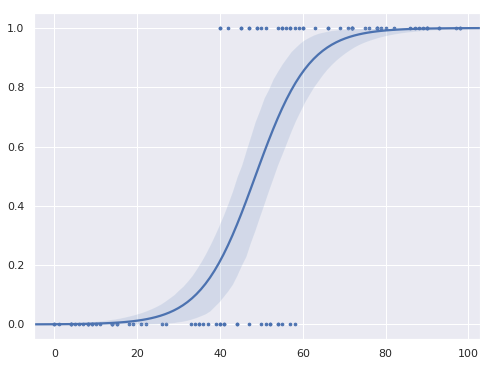

In [3]:
#ロジスティック回帰
#目的変数が二値のときに利用。予測値はクラス所属確率
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x_values = np.concatenate((np.random.randint(0, 60, 50),
                           np.random.randint(40, 100, 50)))
y_values = np.concatenate((np.repeat(0, 50),
                          np.repeat(1, 50)))

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.regplot(x=x_values, y=y_values, logistic=True,
           scatter_kws={"s": 7, "alpha": 1})
plt.show()

### lmplot
- figureレベル関数
- **Gridを返却する

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#飲食店のチップの額のデータセット
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


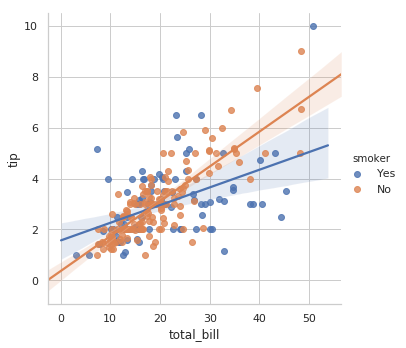

In [25]:
#色分け hue 凡例 legend
sns.set(style="whitegrid")
gr = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, height=5, legend=True)
print(gr)
plt.show()

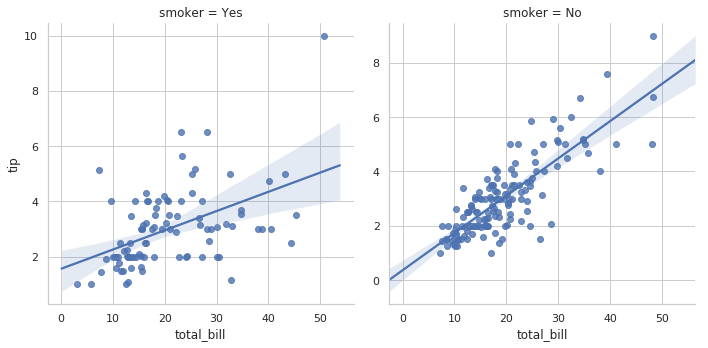

In [32]:
#列分け　col 行分け row y軸の目盛りを独立にする
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips, sharey=False)

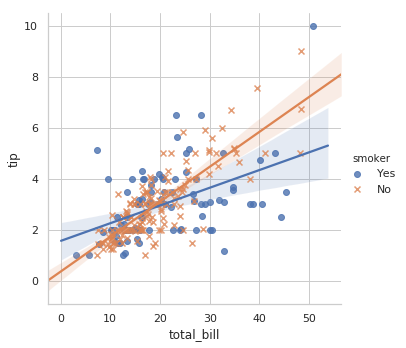

In [35]:
#マーカーをoとxにする
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"])
plt.show()

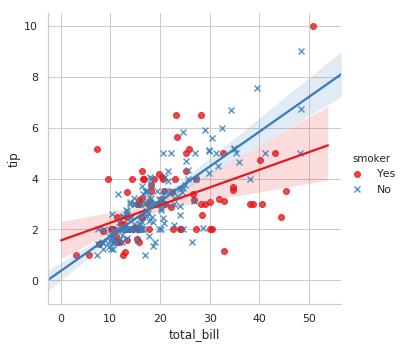

In [37]:
#色指定　カラーパレットの使用
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           palette="Set1", markers=["o", "x"])

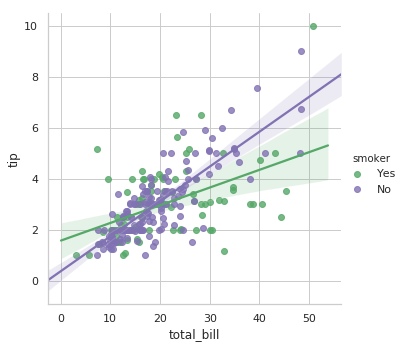

In [38]:
#色の指定 Yesはgreen　Noはmazenda
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           palette=dict(Yes="g", No="m"))

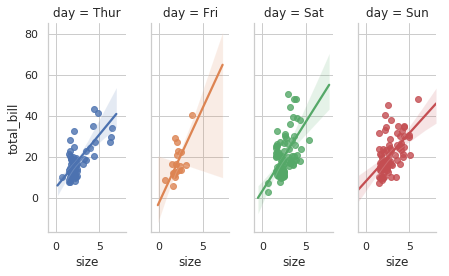

In [48]:
#アスペクト比の設定aspect　x_jitterはx軸にブレをランダムで加える
sns.lmplot(x="size", y="total_bill", hue="day", col="day", data=tips,
          aspect=0.4, x_jitter=0.5, height=4)

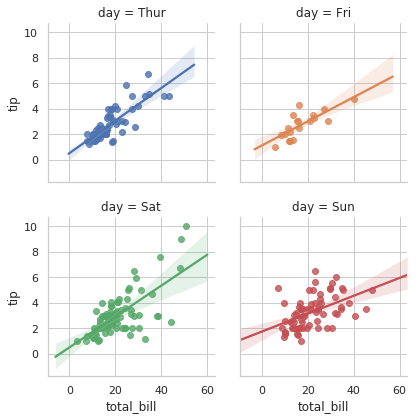

In [50]:
#四角形に表示 一行に何個表示するかの指定
sns.lmplot(x="total_bill", y="tip", col="day", hue="day", height=3, data=tips, col_wrap=2)

### 他の具体例

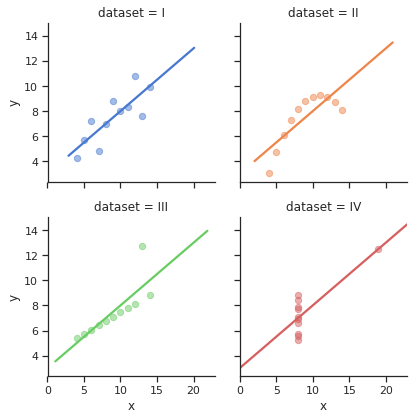

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="ticks")
df = sns.load_dataset("anscombe") # seabornに含まれるサンプルデータの一つを読み込み
grid = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
                  col_wrap=2, ci=None, palette="muted", height=3, #ciはエラーバーのサイズ
                  scatter_kws={"s": 40, "alpha": 0.5}) #alpha 透過度 sサイズ

## 平均値や件数の可視化

### counterplot
- 件数を集計し、ヒストグラムとして出力

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


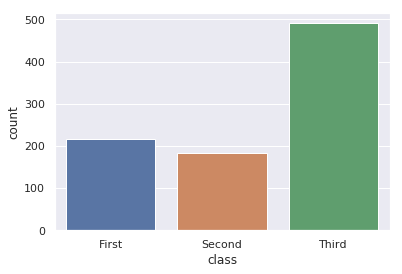

In [58]:
#一等室などの乗客数のヒストグラム
sns.set(style="darkgrid")
sns.countplot(x="class", data=titanic)
plt.show()

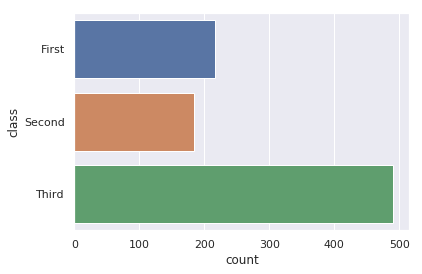

In [59]:
sns.countplot(y="class", data=titanic)

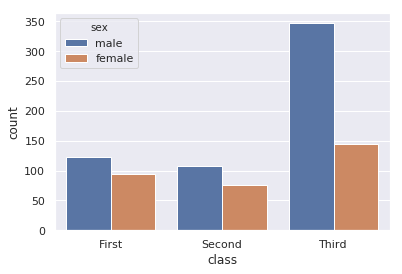

In [61]:
#乗客数を男女別に描画
sns.countplot(x="class", hue="sex", data=titanic)

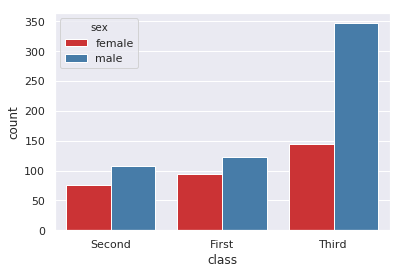

In [65]:
#棒の順序の入れ替え　hueの入れ替え
sns.countplot(x="class", hue="sex", 
              order=["Second", "First", "Third"], 
              hue_order=["female", "male"],
              palette="Set1", data=titanic)

### barplot
- 数値の平均値を高さ、信頼区間をエラーバーとして表示する
- ヒストグラムとは全く違うものだが、順番の指定等はcounterplotと同様

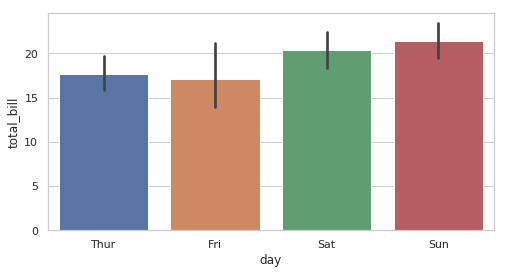

In [68]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()

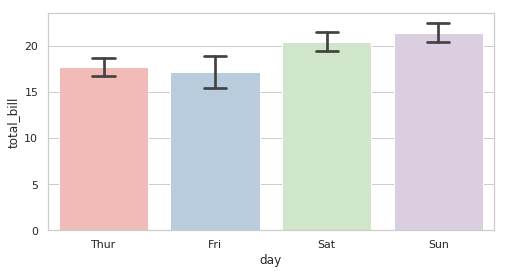

In [73]:
# 終端(キャップ)の表示　信頼区間を68%に
plt.figure(figsize=(8, 4))
sns.barplot(x="day", y="total_bill", data=tips, capsize=0.2, ci=68,
            palette="Pastel1")
plt.show()

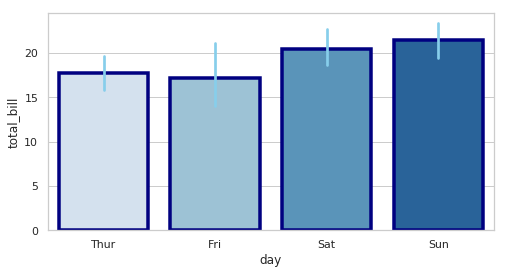

In [75]:
plt.figure(figsize=(8, 4))
sns.barplot(x="day", y="total_bill", data=tips, 
            palette="Blues", edgecolor="navy", errcolor="skyblue",
            linewidth=3.5)

## ヒートマップの可視化
- heatmap, clustermapの二つ
- 前者は普通のやつ
- 後者はクラスタ分析を行う